In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ данных об авариях в США за 2022 год с целью их уменьшения.

Необходимо выявить инсайты и закономерности в данных об авариях, результаты исследования могут помочь в принятии решений, направленныех на снижение количества аварий.

Датасет с данными об авариях объёмный, содержит информациб за 2016-2022 год. Датасет с демографическими данными поможет оценть 

План работы:

Шаг 1. Загрузка данных

Шаг 2. Предобработка данных

2.1 Проверить пропуски и дубликаты
2.2 Привести названия столбцов к змеиному типу
2.3 Выделить столбик с месяцем аварии

Шаг 3. Исследовательский анализ

4.1 Как погодные условия влияют на количество аварий
4.2 Как сумерки влияют
4.3 Сегментировать аварии по серьёзности ущерба.
4.4 Проверить количество аварий по штатам
4.5 Проверить количество аварий по городам

## Предобработка данных.

In [34]:
# Загрузим датасет
csv_file_path = "D:\\учеба\\Методич\\US_Accidents_March23.csv"

In [35]:
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000  # Указать подходящий размер порции
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# Пример обработки данных: подсчет общего числа строк в файле
total_rows = 0

# Обработка данных в цикле
for chunk in chunks:
    # Ваши операции обработки данных
    # В данном примере мы просто увеличиваем счетчик строк
    total_rows += len(chunk)

# Вывод общего числа строк в файле
print("Общее число строк в файле:", total_rows)


Общее число строк в файле: 7728394


In [36]:
# Посмотреть общую информацию о данных в каждой порции
for chunk in chunks:
    print(chunk.info())

In [37]:
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# Выберите первую порцию данных и выведите ее содержимое
first_chunk = next(chunks)
print(first_chunk)

             ID   Source  Severity           Start_Time             End_Time  \
0           A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1           A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2           A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3           A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4           A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
...         ...      ...       ...                  ...                  ...   
99995  A-100002  Source2         3  2016-04-05 15:52:14  2016-04-05 16:52:14   
99996  A-100003  Source2         3  2016-04-05 15:57:10  2016-04-05 16:57:10   
99997  A-100004  Source2         2  2016-04-05 16:02:16  2016-04-05 17:02:16   
99998  A-100005  Source3         2  2016-04-05 16:01:17  2016-04-05 17:01:17   
99999  A-100006  Source2         2  2016-04-05 16:06:41  2016-04-05 17:06:41   

       Start_Lat   Start_Lng  End_Lat  

In [38]:
# Создайте пустой список, чтобы хранить отфильтрованные части данных
filtered_chunks = []

# Проходитесь по каждой части данных, применяете операции с датами и фильтрацию
for chunk in chunks:
    # Преобразуйте столбец 'Start_Time' в тип datetime
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    # Создайте условие фильтрации для получения строк за 2022 год
    condition = (chunk['Start_Time'].dt.year == 2022)
    # Примените условие фильтрации к текущей части данных
    filtered_chunk = chunk[condition]
    # Если есть хотя бы одна строка удовлетворяющая условию, добавьте отфильтрованную часть данных в список
    if not filtered_chunk.empty:
        filtered_chunks.append(filtered_chunk)

# Проверьте, что хотя бы одна часть данных удовлетворяет условию фильтрации
if len(filtered_chunks) > 0:
    # Объедините отфильтрованные части данных в один DataFrame
    df_2022 = pd.concat(filtered_chunks)
    # Выведите информацию о DataFrame
    print(df_2022.info())
else:
    print("Нет данных за 2022 год.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762452 entries, 512217 to 5423496
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code     

In [39]:
# Создайте новый DataFrame, копируя данные из отфильтрованного DataFrame
new_df = df_2022.copy()

In [40]:
# приведём названия столбцов к единому типу
new_df.columns = [x.lower().replace(' ', '_') for x in new_df.columns]
display(new_df.head())

,id,source,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Day,Day
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Night,Night
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Night,Night
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Day,Day
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,False,Night,Day,Day,Day


In [41]:
new_df.isna().sum()

id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  236182
end_lng                  236182
distance(mi)                  0
description                   0
street                     7236
city                         65
county                        0
state                         0
zipcode                     307
country                       0
timezone                   1713
airport_code               7199
weather_timestamp         29595
temperature(f)            38718
wind_chill(f)             54508
humidity(%)               41107
pressure(in)              33134
visibility(mi)            41953
wind_direction            48385
wind_speed(mph)           48377
precipitation(in)         64475
weather_condition         38688
amenity                       0
bump                          0
crossing

id - идентификатор аварии

source - источник, сообщивший об аварии

severity - степень серьёзности (от 1 до 4)

start_tim

end_time

start_lat

start_lng  

end_lat   

end_lng  

distance(mi)

description  

street  

city   

county  

state  

zipcode  

country   

timezone   

airport_code

weather_timestamp

Temperature(F) - Показывает температуру (в Фаренгейтах).

Wind_Chill(F) - Показывает холод ветра (по Фаренгейту).

Humidity(%) - Показывает влажность (в процентах).

Pressure(in) - Показывает давление воздуха (в дюймах).

Visibility(mi) - Показывает видимость (в милях).

Wind_Direction - Показывает направление ветра.

Wind_Speed(mph) - Показывает скорость ветра (в милях в час).

Precipitation(in) - Показывает количество осадков в дюймах, если они есть.

Weather_Condition - Показывает погодные условия (дождь, снег, гроза, туман и т.д.).

amenity

bump

crossing

give_way

junction

no_exit

railway

roundabout

station

stop

traffic_calming

traffic_signal

turning_loop

sunrise_sunset

civil_twilight

nautical_twilight

astronomical_twilight  

In [44]:
new_df['id'].count()

1762452

In [45]:
print("Количество аварий ночью:", new_df.query('sunrise_sunset == "Night"')['id'].count())

Количество аварий ночью: 492367


In [46]:
new_df.query('sunrise_sunset == "Day"')['id'].count()

1255189

<AxesSubplot:xlabel='state'>

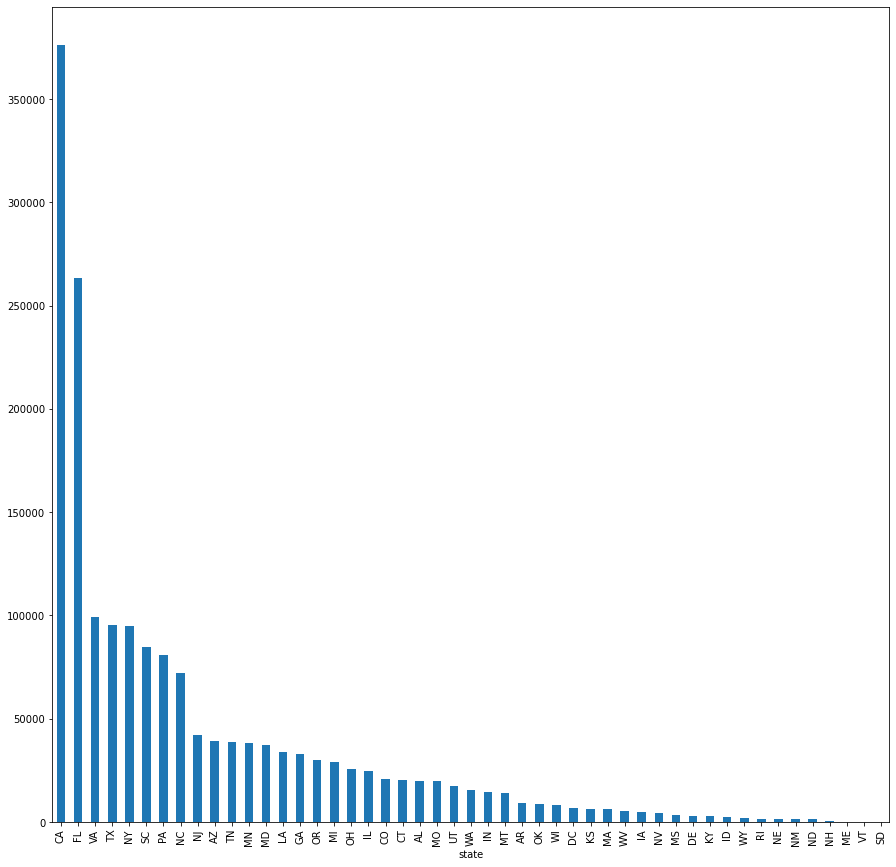

In [63]:
#количество аварий по штатам
new_df.groupby('state')['id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,15))

Общая численность в каждом штате:
    
    соотнести кол-во жителей и количество аварий. (Какой процент в каждои штате?)

<AxesSubplot:xlabel='severity'>

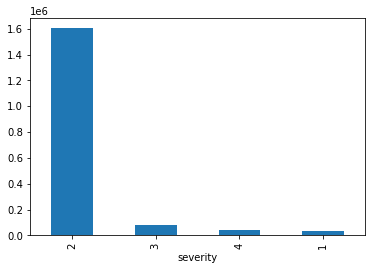

In [53]:
new_df.groupby('severity')['id'].count().sort_values(ascending=False).plot(kind='bar')

Больше всего аварий 2 степени серьёзности - около 1,6 млн

<AxesSubplot:xlabel='city'>

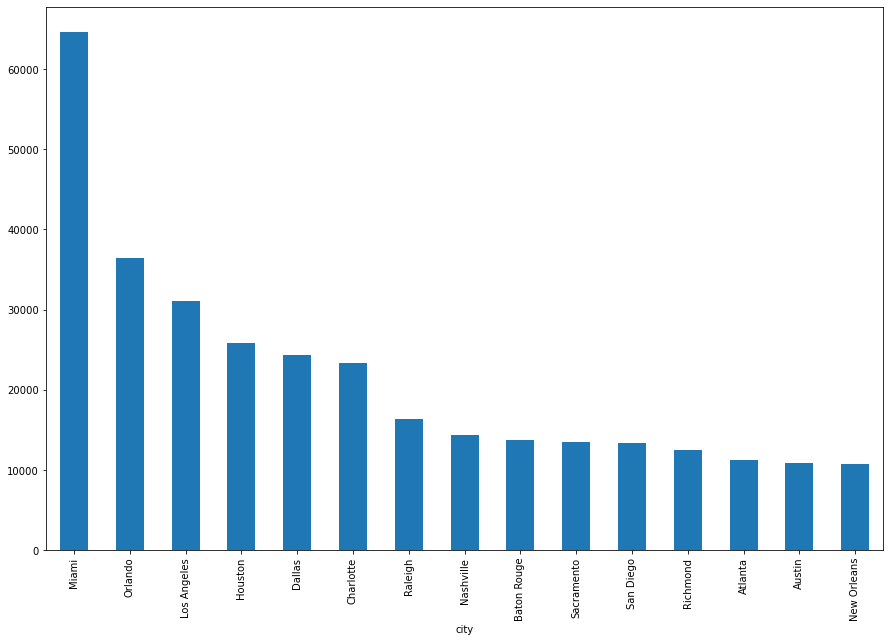

In [59]:
# посмотрим, в каких городах больше всего аварий
new_df.groupby('city')['id'].count().sort_values(ascending=False).head(15).plot(kind='bar', figsize = (15,10))

In [62]:
new_df.groupby('city')['id'].count().sort_values(ascending=False).head(15)

city
Miami          64544
Orlando        36413
Los Angeles    31072
Houston        25865
Dallas         24306
Charlotte      23308
Raleigh        16410
Nashville      14368
Baton Rouge    13683
Sacramento     13543
San Diego      13324
Richmond       12514
Atlanta        11234
Austin         10906
New Orleans    10704
Name: id, dtype: int64

В городах Майами и Орландо было больше всего аварий (64544 и 36413) при плотности населения: Майами - 435 919 чел., Орландо -287 442 чел. При этом в городах миллионниках аварий было меньше, чем Майами и Орландо, например:

1. Лос-Анджелись - население 3 898 747
2. Хьюстон 2 320 268
3. Dallas 

In [ ]:
# Удалить столбцы 'Column1' и 'Column2' из DataFrame df, чтоб создать датафрейм с погодой
weather = new_df.drop(['source', 'start_Time', 'end_time', 'Start_Lat', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [ ]:
weather

Temperature(F) - Показывает температуру (в Фаренгейтах).

Wind_Chill(F) - Показывает холод ветра (по Фаренгейту).

Humidity(%) - Показывает влажность (в процентах).

Pressure(in) - Показывает давление воздуха (в дюймах).

Visibility(mi) - Показывает видимость (в милях).

Wind_Direction - Показывает направление ветра.

Wind_Speed(mph) - Показывает скорость ветра (в милях в час).

Precipitation(in) - Показывает количество осадков в дюймах, если они есть.

Weather_Condition - Показывает погодные условия (дождь, снег, гроза, туман и т.д.).

In [ ]:
weather.corr()

In [ ]:
# Предположим, что у вас уже есть DataFrame weather с данными о погоде
# Если вы хотите построить тепловую карту для всех числовых столбцов, можно сделать так:
correlation_matrix = weather.corr()

# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()


In [ ]:
twilight = new_df.drop(['Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition','Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis=1)

In [ ]:
twilight.corr()

In [ ]:
correlation_2 = twilight.corr()
# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()